Цель работы: разработать инструмент для обнаружения дефектов разрыва оксидного аморфного слоя, образовавшихся в результате приложения к образцам напряжения пробоя, а также их площади по электронно-микроскопическим изображениям с разным увеличением.

Задачи:
- определение оптимального размера изображения (в пикселях) для обучения модели и предсказания
    - использование полученной программы предпологает съемку крупного по площади изображения с определенным увеличением, нарезку его на части, получние предсказаний по каждой из них (попиксельно) и сборку предсказаний в изображение такого же размера как и исходное
- разметка изображений (попиксельная классификация) и их аугментация
    - какую долю от изображения должен занимать обнаруживаемый объект?
- обучение моделей разной глубины, предлагается взять за основу сверточные модели глубиной 6 (2700 параметров) и 9 (3700000 параметров) слоев из проектов по распознаванию жестов и пчел, соответственно. Необходимо выбрать оптимальную модель по соотношению скорость работы - точность, т.к. планируется обрабатывать изображения большой площади
- провести интерпретацию работы моделей (оценить результаты сверточных слоев по ядрам сверток, проверить выход после каждого слоя) для того чтобы определить какие участки дефектов являются наиболее важными для определения

Окно размером 100х100 пикселей на первый взгляд выглядит оптимальным, а также размер изображения 150 мкм HFW.

Изображения с увеличением 30 мкм HFW можно сжать в 4 раза.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage as sk

Функция для сжатия изображений.

In [2]:
def compression(array, coef):

    new_list = [0] * (array.shape[1] // coef)
    for i in range(array.shape[0] // coef):
        new_list[i] = []
        for j in range(array.shape[1] // coef):
            compression = round(array[i*coef:i*coef+coef, j*coef:j*coef+coef].mean())
            new_list[i].append(int(compression))
    return np.array(new_list)

977A ppx


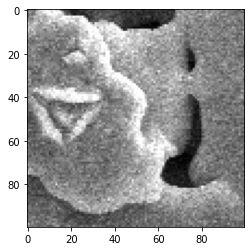

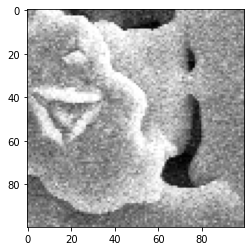

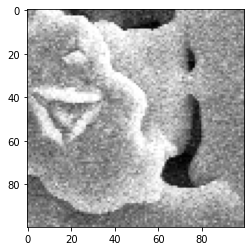

Size: (100, 100)


In [17]:
im_700x = plt.imread('../images/features/ETD_2_006_977A_1_1.jpg')
im_700x_gs = sk.color.rgb2gray(im_700x)
print('977A ppx')
plt.imshow(im_700x, cmap='Greys_r')
plt.show()
plt.imshow(im_700x[..., 0], cmap='Greys_r')
plt.show()
plt.imshow(im_700x_gs, cmap='Greys_r')
plt.show()
print('Size:', im_700x_gs.shape)

In [10]:
im_700x[..., 0]

array([[106, 126, 128, ...,  92, 133, 111],
       [125, 156, 117, ..., 118,  95, 102],
       [ 98, 130, 101, ..., 135, 145, 128],
       ...,
       [106,  90, 145, ..., 105,  98,  98],
       [188, 123, 148, ...,  97,  89,  97],
       [144, 123, 111, ...,  99, 105, 129]], dtype=uint8)

In [13]:
im_700x[:, :, 1]

array([[106, 126, 128, ...,  92, 133, 111],
       [125, 156, 117, ..., 118,  95, 102],
       [ 98, 130, 101, ..., 135, 145, 128],
       ...,
       [106,  90, 145, ..., 105,  98,  98],
       [188, 123, 148, ...,  97,  89,  97],
       [144, 123, 111, ...,  99, 105, 129]], dtype=uint8)

In [12]:
im_700x[..., 2]

array([[106, 126, 128, ...,  92, 133, 111],
       [125, 156, 117, ..., 118,  95, 102],
       [ 98, 130, 101, ..., 135, 145, 128],
       ...,
       [106,  90, 145, ..., 105,  98,  98],
       [188, 123, 148, ...,  97,  89,  97],
       [144, 123, 111, ...,  99, 105, 129]], dtype=uint8)